# 測定データのCSVファイルを読み込み、補正後の記録値を得る

ライブラリの取り込み

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import codecs

# グラフのデフォルトフォントを指定
plt.rcParams['font.size'] = 18
# データフレームの桁数設定
pd.options.display.precision = 3

CSVファイルのヘッダ部分を読み飛ばすためヘッダの行数を取得（ファイルはshift-jis）<br>
<font color='red'>CSVファイルのフッタ部（文字情報あり）はあらかじめ消去しておくこと！</font>

In [301]:
csv_path_1 = './0712/'
file_name ='000_G10'
#save_csv = True    # 生成した DF を csv 保存するときは True
save_csv = False

csv_path = csv_path_1 + file_name    # 後で DF を名前を変えて保存するため'.csv'を含めない

fin = codecs.open(csv_path + '.csv', "r", "shift_jis")
data = fin.readline()
arry = data.split(',')
if not('BeginHeader' in arry[0]):
    print('測定データではありません。')
else:
    skip_length = int(arry[1])
    print(data, end='')
    for i in range(skip_length + 3):
        print(fin.readline(), end='')
fin.close()

#BeginHeader,2,,,,,,,
#EndHeader,time,(1)HV-CH01,(1)HV-CH02,(1)HV-CH03,(1)HV-CH04,(2)HV-CH01,(2)HV-CH02,(2)HV-CH03
2022/7/12 15:11,0,-9.14,-0.747,-9.124,-0.399,-9.426,-0.678,1.065
2022/7/12 15:11,10000,-9.14,-0.741,-9.123,-0.398,-9.426,-0.684,1.062
2022/7/12 15:11,20000,-9.143,-0.736,-9.125,-0.398,-9.426,-0.678,1.065
2022/7/12 15:11,30000,-9.143,-0.754,-9.124,-0.399,-9.423,-0.687,1.065


CSVファイルの取り込み ヘッダ部スキップ、読み込み列指定、ヘッダ変更
※体験版で実際は動かないので、低電圧と高電圧を読み込む

In [302]:
header = ['R_d', 'R_h', 'T_d', 'T_h' ,'Guide', 'RoadL', 'RoadR']
df = pd.read_csv(csv_path + '.csv', skiprows=skip_length, usecols=[2,3,4,5,6,7,8], names=header, header=None, encoding='shift_jis')

df

,R_d,R_h,T_d,T_h,Guide,RoadL,RoadR
0,-9.140,-0.747,-9.124,-0.399,-9.426,-0.678,1.065
1,-9.140,-0.741,-9.123,-0.398,-9.426,-0.684,1.062
2,-9.143,-0.736,-9.125,-0.398,-9.426,-0.678,1.065
3,-9.143,-0.754,-9.124,-0.399,-9.423,-0.687,1.065
4,-9.140,-0.761,-9.124,-0.399,-9.426,-0.684,1.065
...,...,...,...,...,...,...,...
495,-9.136,-0.797,-9.120,-0.399,-9.426,-0.687,1.059
496,-9.139,-0.798,-9.118,-0.399,-9.426,-0.687,1.059
497,-9.138,-0.792,-9.119,-0.399,-9.426,-0.687,1.062
498,-9.139,-0.798,-9.119,-0.399,-9.426,-0.684,1.059


In [303]:
df.describe()

,R_d,R_h,T_d,T_h,Guide,RoadL,RoadR
count,500.000,500.000,500.000,5.000e+02,500.000,500.000,500.000
mean,-9.141,-0.741,-9.122,-3.989e-01,-9.425,-0.687,1.063
std,0.003,0.029,0.003,4.694e-04,0.002,0.002,0.002
min,-9.153,-0.798,-9.129,-4.000e-01,-9.429,-0.690,1.059
25%,-9.142,-0.762,-9.124,-3.990e-01,-9.426,-0.687,1.062
50%,-9.141,-0.736,-9.122,-3.990e-01,-9.426,-0.687,1.062
75%,-9.139,-0.716,-9.120,-3.990e-01,-9.423,-0.687,1.065
max,-9.132,-0.696,-9.116,-3.980e-01,-9.420,-0.678,1.068


Text(0.5, 0, 'difference [mm]')

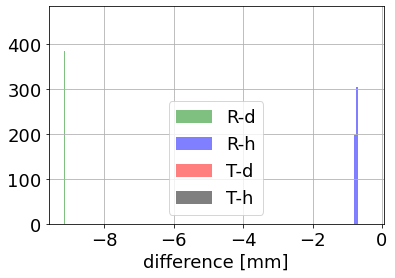

In [304]:
bins = 2
xlim = .1

df["R_d"].hist(bins=bins, color="green", label = 'R-d', alpha=0.5)
df["R_h"].hist(bins=bins, color="blue", label = 'R-h', alpha=0.5)
df["T_d"].hist(bins=bins, color="red", label = 'T-d', alpha=0.5)
df["T_h"].hist(bins=bins, color="black", label = 'T-h', alpha=0.5)

plt.legend()
plt.xlabel("difference [mm]")
#plt.xlim(-xlim, xlim)

Text(0, 0.5, 'difference [mm]')

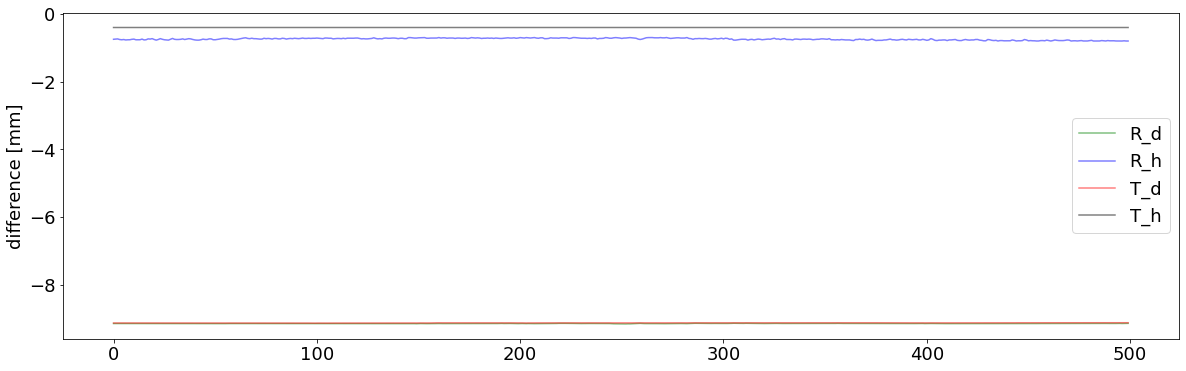

In [305]:
ylim = 1

df["R_d"].plot(style="g-", label = 'R_d', alpha=0.5, figsize=(20, 6))
df["R_h"].plot(style="b-", label = 'R_h', alpha=0.5)
df["T_d"].plot(style="r-", label = 'T_d', alpha=0.5)
df["T_h"].plot(style="k-", label = 'T_h', alpha=0.5)

plt.legend()
plt.ylabel("difference [mm]")
#plt.ylim(-ylim, ylim)

Text(0.5, 0, 'defference [mm]')

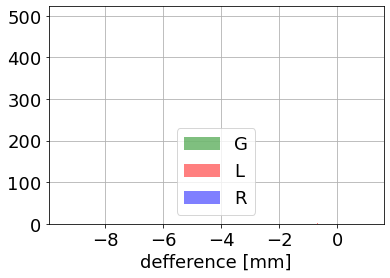

In [306]:
bins = 2
xlim = .1

df["Guide"].hist(bins=bins, color="green", label = 'G', alpha=0.5)
df["RoadL"].hist(bins=bins, color="red", label = 'L', alpha=0.5)
df["RoadR"].hist(bins=bins, color="blue", label = 'R', alpha=0.5)

plt.legend()
plt.xlabel("defference [mm]")
#plt.xlim(-xlim, xlim)

Text(0, 0.5, 'difference [mm]')

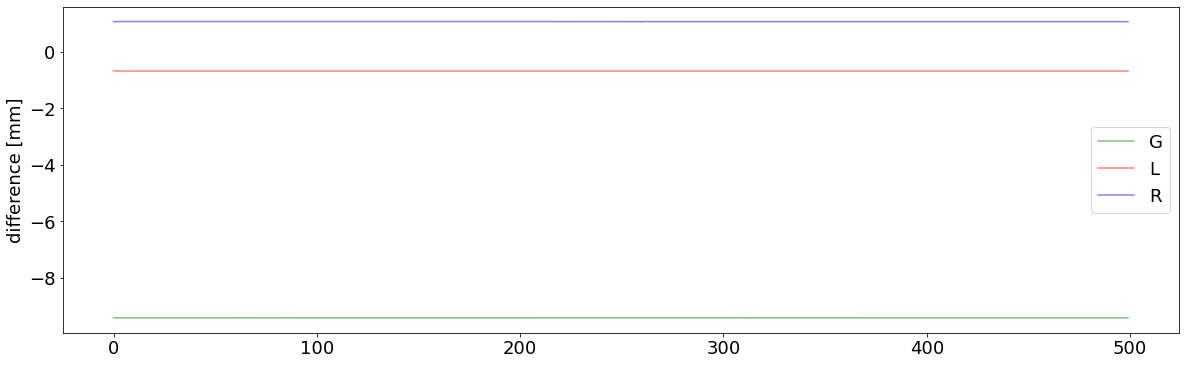

In [307]:
df["Guide"].plot(style="g-", label = 'G', alpha=0.5, figsize=(20,6))
df["RoadL"].plot(style="r-", label = 'L', alpha=0.5)
df["RoadR"].plot(style="b-", label = 'R', alpha=0.5)

ylim = 1
plt.legend()
plt.ylabel("difference [mm]")
# plt.ylim(-ylim, ylim)
# plt.xlim(0, 200)

### 3σを基準に外れ値をNaNで埋める関数

In [308]:
def outlier_3s(df):
    
    for i in range(len(df.columns)):
        # 列の抽出
        col = df.iloc[:,i]
        # 平均と標準偏差
        average = np.mean(col)
        sd = np.std(col)
        
        # 外れ値の基準点
        outlier_min = average - sd*3
        outlier_max = average + sd*3
        
        # 範囲から外れている値をNaNに
        col[col < outlier_min] = None
        col[col > outlier_max] = None
        
    return df

DF の外れ値をNaNで埋める

In [309]:
df3 = outlier_3s(df).copy()    # pandasのSettingWithCopyWarningを避けるため.copy()を追加
df3

,R_d,R_h,T_d,T_h,Guide,RoadL,RoadR
0,-9.140,-0.747,-9.124,-0.399,-9.426,NaN,1.065
1,-9.140,-0.741,-9.123,-0.398,-9.426,-0.684,1.062
2,-9.143,-0.736,-9.125,-0.398,-9.426,NaN,1.065
3,-9.143,-0.754,-9.124,-0.399,-9.423,-0.687,1.065
4,-9.140,-0.761,-9.124,-0.399,-9.426,-0.684,1.065
...,...,...,...,...,...,...,...
495,-9.136,-0.797,-9.120,-0.399,-9.426,-0.687,1.059
496,-9.139,-0.798,-9.118,-0.399,-9.426,-0.687,1.059
497,-9.138,-0.792,-9.119,-0.399,-9.426,-0.687,1.062
498,-9.139,-0.798,-9.119,-0.399,-9.426,-0.684,1.059


NaNを含む行を削除

In [310]:
df3.dropna(how='any', axis=0, inplace=True)
df3

,R_d,R_h,T_d,T_h,Guide,RoadL,RoadR
1,-9.140,-0.741,-9.123,-0.398,-9.426,-0.684,1.062
3,-9.143,-0.754,-9.124,-0.399,-9.423,-0.687,1.065
4,-9.140,-0.761,-9.124,-0.399,-9.426,-0.684,1.065
5,-9.140,-0.754,-9.124,-0.399,-9.426,-0.687,1.065
6,-9.140,-0.767,-9.125,-0.398,-9.426,-0.684,1.065
...,...,...,...,...,...,...,...
495,-9.136,-0.797,-9.120,-0.399,-9.426,-0.687,1.059
496,-9.139,-0.798,-9.118,-0.399,-9.426,-0.687,1.059
497,-9.138,-0.792,-9.119,-0.399,-9.426,-0.687,1.062
498,-9.139,-0.798,-9.119,-0.399,-9.426,-0.684,1.059


# 手動測定値の入力

In [311]:
# (R_h, R_d, T_h, T_d)

# 基準点の測定値
origin_08 = (1, 0, 0, 0)
origin_08H = (2, -4, 2, -2)
origin_13 = (-3, -1, -3, -1)

In [312]:
# 測定ゲージによる測定値　key = file_name

manual_08 = {'1_zeo': (1, 0, 0, 0),
             '1_294': (2, 0, -1, 0),
             '1_293': (-1, -1, 0, -3),
             '1_292': (-1, 2, 4, -1),
             '1_291': (4, -1, 4, 0),
             '1_hazure': (0, 2, 3, -2)
            }

In [313]:
manual_12 = {'000': (1, 0, 0, 0),
             '000_L4': (1, 0, 0, 0),
             '000_R4': (1, 0, 0, 0),
             '000_G10': (1, 0, 0, 0),
             '294': (2, 0, -1, 0),
             '293': (-1, -1, 0, -3),
             '292': (-1, 2, 4, -1),
             '291': (4, -1, 4, 0)
            }

In [314]:
manual_08H = {'1_zero': (2, -4, 2, -2),
              '103': (4, 0, 4, -2),
              '102': (0, 0, 0, -2),
              '101': (2, -2, 3, -1),
              '100': (0, -1, 1, 0),
              '078': (-3, 0, -2, 0),
              '079': (0, 0, 3, 4),
              '080': (1, -2, 3, 0),
              '081': (1, -2, 1, 0),
              '082': (2, 0, 2, 1),
              '083': (0, 0, 2, -1),
              '084': (-1, 3, 0, -1),
              '085': (-3, 0, 0, 0),
              '086': (-1, -2, 1, 0)
             }

In [315]:
manual_13a = {'130-zero': (-3, -1, -3, -1),
              '130': (-3, -1, -3, -1),
              '129': (-3, 0, -3, -2),
              '128': (1, 0, 0, -1),
              '127': (-2, 1, 0, 0),
              '126': (-2, -1, -1, 0),
              '125': (1, 1, 1, 0),
              '124': (0, 0, 0, 0),
              '123': (-3, 0, 1, 0),
              '122': (-2, 0, 1, 0),
              '121': (1, 0, 2, 0),
              '120': (-1, 0, -2, 0),
              '119': (0, 0, 0, -1),
              '118': (0, -3, 0, -2),
              '117': (0, 0, 3, 0),
              '116': (0, 0, 1, 0),
              '115': (0, 0, 3, 0),
              '114': (0, 0, 3, 0),
              '113': (1, -1, 2, 0),
              '112': (0, 0, 3, 0),
              '107': (0, 1, -1, 0),
              '106': (-1, 0, 3, 0),
              '105': (-1, 0, 0, -2),
              '104': (-1, 0, 0, -2),
              '103': (-1, 0, -1, -2),
              '102': (0, -1, 0, -1),
              '101': (0, -3, 0, -2)
             }

In [316]:
manual_13b = {'104': (1, -3, 3, -1),
              '103': (3, 0, 4, -1),
              '102': (0, 0, 0, -1),
              '101': (2, -2, 3, 0),
              '100': (0, 0, 1, 0),
              '099': (-1, -3, 1, -4),
              '098': (-1, -1, 3, -1),
              '097': (-1, -1, 2, 0),
              '096': (0, -2, 0, -1),
              '095': (0, 0, 4, 0),
              '094': (3, -1, 4, 0),
              '093': (0, -2, 4, 0),
              '092': (0, 0, 1, 0),
              '091': (0, -3, 0, -3),
              '090': (0, 0, 3, 0),
              '089': (2, 0, 4, 0),
              '088': (0, 0, 1, 0),
              '087': (-2, -2, 0, -2),
              '086': (-1, -2, 0, 0),
              '085': (-2, 0, 0, 0),
              '084': (-1, 2, 0, -1),
              '083': (0, 0, 2, 0),
              '082': (2, -1, 2, 0),
              '081': (1, -2, 2, -1),
              '080': (1, -2, 3, 0),
              '079': (0, 0, 3, 4),
              '078': (-3, 0, -2, 0)
             }


In [317]:
# 計算に使う手動測定値セットの選択

if csv_path_1 == './0708/':
    origin = origin_08
    manual = manual_08
    
elif csv_path_1 == './0708H/':
    origin = origin_08H
    manual = manual_08H

elif csv_path_1 == './0712/':
    origin = origin_08
    manual = manual_12

elif csv_path_1 == './0712run/':
    origin = origin_08
    manual = manual_12

elif csv_path_1 == './0713a/':
    origin = origin_13
    manual = manual_13a
    
elif csv_path_1 == './0713b/':
    origin = origin_13
    manual = manual_13b
    
elif csv_path_1 == './0713c/':
    origin = origin_13
    manual = manual_13a

In [318]:
# 基準点補正後の手動測定の値
if csv_path_1 in ['./0712run/']:
    df3["R_h_man"] = manual[file_name[-3:]][0] - origin[0]    # ファイル名末尾の3桁の番号を取得
    df3["R_d_man"] = manual[file_name[-3:]][1] - origin[1]
    df3["T_h_man"] = manual[file_name[-3:]][2] - origin[2]
    df3["T_d_man"] = manual[file_name[-3:]][3] - origin[3]

else:
    df3["R_h_man"] = manual[file_name][0] - origin[0]
    df3["R_d_man"] = manual[file_name][1] - origin[1]
    df3["T_h_man"] = manual[file_name][2] - origin[2]
    df3["T_d_man"] = manual[file_name][3] - origin[3]


In [319]:
df3.describe()

,R_d,R_h,T_d,T_h,Guide,RoadL,RoadR,R_h_man,R_d_man,T_h_man,T_d_man
count,490.000,490.000,490.000,4.900e+02,490.000,490.000,490.000,490.0,490.0,490.0,490.0
mean,-9.141,-0.741,-9.122,-3.989e-01,-9.425,-0.687,1.063,0.0,0.0,0.0,0.0
std,0.003,0.029,0.003,4.665e-04,0.002,0.001,0.002,0.0,0.0,0.0,0.0
min,-9.149,-0.798,-9.129,-4.000e-01,-9.429,-0.690,1.059,0.0,0.0,0.0,0.0
25%,-9.142,-0.765,-9.125,-3.990e-01,-9.426,-0.687,1.062,0.0,0.0,0.0,0.0
50%,-9.141,-0.736,-9.122,-3.990e-01,-9.426,-0.687,1.062,0.0,0.0,0.0,0.0
75%,-9.139,-0.716,-9.120,-3.990e-01,-9.423,-0.687,1.065,0.0,0.0,0.0,0.0
max,-9.133,-0.696,-9.116,-3.980e-01,-9.423,-0.684,1.068,0.0,0.0,0.0,0.0


Text(0, 0.5, 'difference [mm]')

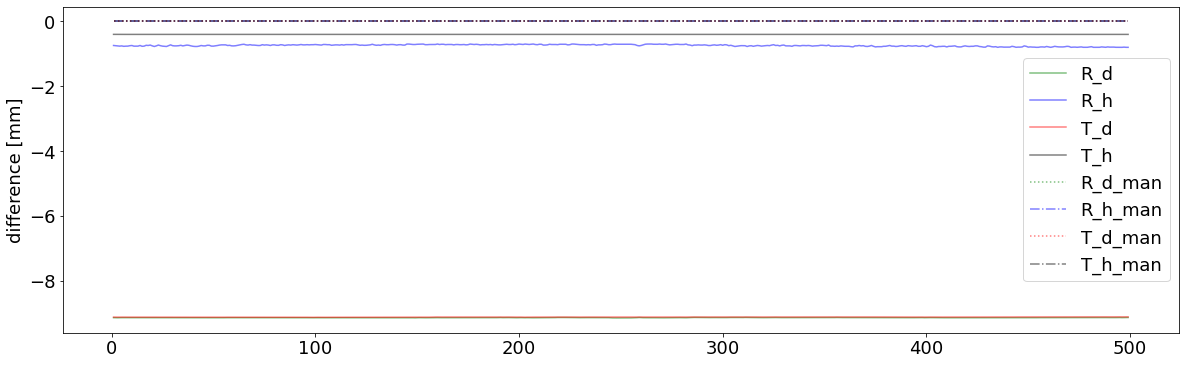

In [320]:
ylim = 1

df3["R_d"].plot(style="g-", label = 'R_d', alpha=0.5, figsize=(20, 6))
df3["R_h"].plot(style="b-", label = 'R_h', alpha=0.5)
df3["T_d"].plot(style="r-", label = 'T_d', alpha=0.5)
df3["T_h"].plot(style="k-", label = 'T_h', alpha=0.5)

df3["R_d_man"].plot(style="g:", label = 'R_d_man', alpha=0.5, figsize=(20, 6))
df3["R_h_man"].plot(style="b-.", label = 'R_h_man', alpha=0.5)
df3["T_d_man"].plot(style="r:", label = 'T_d_man', alpha=0.5)
df3["T_h_man"].plot(style="k-.", label = 'T_h_man', alpha=0.5)

plt.legend()
plt.ylabel("difference [mm]")
#plt.ylim(-ylim, ylim)

Text(0, 0.5, 'difference [mm]')

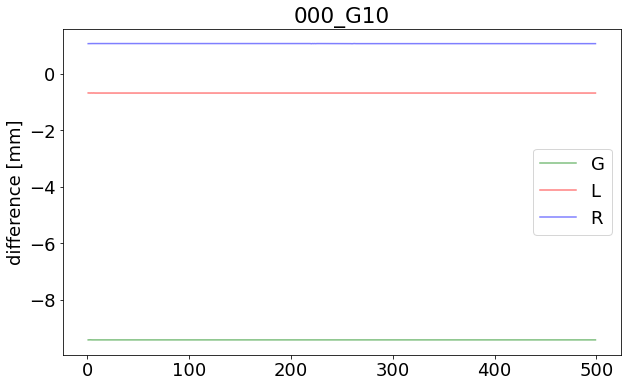

In [321]:
df3["Guide"].plot(style="g-", label = 'G', alpha=0.5, figsize=(10,6))
df3["RoadL"].plot(style="r-", label = 'L', alpha=0.5)
df3["RoadR"].plot(style="b-", label = 'R', alpha=0.5)

ylim = 1
plt.title(file_name)
plt.legend()
plt.ylabel("difference [mm]")
# plt.ylim(-ylim, ylim)
# plt.xlim(0, 200)

DF を名前を変えてcsv保存

In [322]:
# No.2 cell で　save_csv のフラグを設定
if save_csv:
    df3.to_csv(csv_path + "_data.csv", index=False)

In [323]:
TRACK_WIDTH = 1700
R_PHASE = (-500, 780)
S_PHASE = (-500, 625)
T_PHASE = (-500, 470)

# RST = [(-500, 780), (-500, 625), (-500, 470)]
GUIDE = (-600, 300)


def linear_trans_x(coor, th):
    x, y = coor[0], coor[1]
    x_dash = x*np.cos(th) - y*np.sin(th)  
    return x_dash
    
def linear_trans_y(coor, th):
    x, y = coor[0], coor[1]
    y_dash = x*np.sin(th) + y*np.cos(th)    
    return y_dash
    
def get_gradient(r_l, r_r, t_w):
    d_h = r_l - r_r
    theta = np.arctan(d_h / t_w)
    return theta
    

In [324]:
# 台車の回転角度
df3["theta"] = get_gradient(df3["RoadL"], df3["RoadR"], TRACK_WIDTH)

# 各測定ポイントの座標変換
df3["x'_R"] = linear_trans_x(R_PHASE, df3["theta"])
df3["x'_T"] = linear_trans_x(T_PHASE, df3["theta"])

df3["y'_R"] = linear_trans_y(R_PHASE, df3["theta"])
df3["y'_T"] = linear_trans_y(T_PHASE, df3["theta"])

df3["x'_G"] = linear_trans_x(GUIDE, df3["theta"])
df3["y'_G"] = linear_trans_y(GUIDE, df3["theta"])

# 座標移動量の計算
df3["dx_R"] = df3["x'_R"] - R_PHASE[0]
df3["dx_T"] = df3["x'_T"] - T_PHASE[0]

df3["dy_R"] = df3["y'_R"] - R_PHASE[1]
df3["dy_T"] = df3["y'_T"] - T_PHASE[1]

df3["dx_G"] = df3["x'_G"] - GUIDE[0]
# df3["dy_G"] = df3["y'_G"] - GUIDE[1]

# 案内軌条と電車線の水平方向変位（Guide の水平方向変位量でキャンセル）
df3["dx-G_R"] = df3["dx_R"] - df3["dx_G"]
df3["dx-G_T"] = df3["dx_T"] - df3["dx_G"]

# 補正値の計算
df3["corr_R_h"] = df3["dy_R"] - df3["RoadL"]
df3["corr_T_h"] = df3["dy_T"] - df3["RoadL"]

df3["corr_R_d"] = df3["dx-G_R"] - df3["Guide"]
df3["corr_T_d"] = df3["dx-G_T"] - df3["Guide"]

# 補正後の結果（記録値）
df3["R_h'"] = df3["R_h"] + df3["corr_R_h"]
df3["T_h'"] = df3["T_h"] + df3["corr_T_h"]

df3["R_d'"] = df3["R_d"] + df3["corr_R_d"]
df3["T_d'"] = df3["T_d"] + df3["corr_T_d"]

# 手動測定との差
df3["diff_R_d"] = df3["R_d'"] - df3["R_d_man"]
df3["diff_R_h"] = df3["R_h'"] - df3["R_h_man"]
df3["diff_T_d"] = df3["T_d'"] - df3["T_d_man"]
df3["diff_T_h"] = df3["T_h'"] - df3["T_h_man"]

pd.options.display.max_columns = 40
df3

,R_d,R_h,T_d,T_h,Guide,RoadL,RoadR,R_h_man,R_d_man,T_h_man,T_d_man,theta,x'_R,x'_T,y'_R,y'_T,x'_G,y'_G,dx_R,dx_T,dy_R,dy_T,dx_G,dx-G_R,dx-G_T,corr_R_h,corr_T_h,corr_R_d,corr_T_d,R_h',T_h',R_d',T_d',diff_R_d,diff_R_h,diff_T_d,diff_T_h
1,-9.140,-0.741,-9.123,-0.398,-9.426,-0.684,1.062,0,0,0,0,-0.001,-499.199,-499.517,780.513,470.513,-599.692,300.616,0.801,0.483,0.513,0.513,0.308,0.493,0.175,1.197,1.197,9.919,9.601,0.456,0.799,0.779,0.478,0.779,0.456,0.478,0.799
3,-9.143,-0.754,-9.124,-0.399,-9.423,-0.687,1.065,0,0,0,0,-0.001,-499.196,-499.515,780.515,470.515,-599.691,300.618,0.804,0.485,0.515,0.515,0.309,0.495,0.175,1.202,1.202,9.918,9.598,0.448,0.803,0.775,0.474,0.775,0.448,0.474,0.803
4,-9.140,-0.761,-9.124,-0.399,-9.426,-0.684,1.065,0,0,0,0,-0.001,-499.197,-499.516,780.514,470.514,-599.691,300.617,0.803,0.484,0.514,0.514,0.309,0.494,0.175,1.198,1.198,9.920,9.601,0.437,0.799,0.780,0.477,0.780,0.437,0.477,0.799
5,-9.140,-0.754,-9.124,-0.399,-9.426,-0.687,1.065,0,0,0,0,-0.001,-499.196,-499.515,780.515,470.515,-599.691,300.618,0.804,0.485,0.515,0.515,0.309,0.495,0.175,1.202,1.202,9.921,9.601,0.448,0.803,0.781,0.477,0.781,0.448,0.477,0.803
6,-9.140,-0.767,-9.125,-0.398,-9.426,-0.684,1.065,0,0,0,0,-0.001,-499.197,-499.516,780.514,470.514,-599.691,300.617,0.803,0.484,0.514,0.514,0.309,0.494,0.175,1.198,1.198,9.920,9.601,0.431,0.800,0.780,0.476,0.780,0.431,0.476,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-9.136,-0.797,-9.120,-0.399,-9.426,-0.687,1.059,0,0,0,0,-0.001,-499.199,-499.517,780.513,470.513,-599.692,300.616,0.801,0.483,0.513,0.513,0.308,0.493,0.175,1.200,1.200,9.919,9.601,0.403,0.801,0.783,0.481,0.783,0.403,0.481,0.801
496,-9.139,-0.798,-9.118,-0.399,-9.426,-0.687,1.059,0,0,0,0,-0.001,-499.199,-499.517,780.513,470.513,-599.692,300.616,0.801,0.483,0.513,0.513,0.308,0.493,0.175,1.200,1.200,9.919,9.601,0.402,0.801,0.780,0.483,0.780,0.402,0.483,0.801
497,-9.138,-0.792,-9.119,-0.399,-9.426,-0.687,1.062,0,0,0,0,-0.001,-499.197,-499.516,780.514,470.514,-599.691,300.617,0.803,0.484,0.514,0.514,0.309,0.494,0.175,1.201,1.201,9.920,9.601,0.409,0.802,0.782,0.482,0.782,0.409,0.482,0.802
498,-9.139,-0.798,-9.119,-0.399,-9.426,-0.684,1.059,0,0,0,0,-0.001,-499.200,-499.518,780.512,470.512,-599.692,300.615,0.800,0.482,0.512,0.512,0.308,0.492,0.174,1.196,1.196,9.918,9.600,0.398,0.797,0.779,0.481,0.779,0.398,0.481,0.797


(-1.0, 1.0)

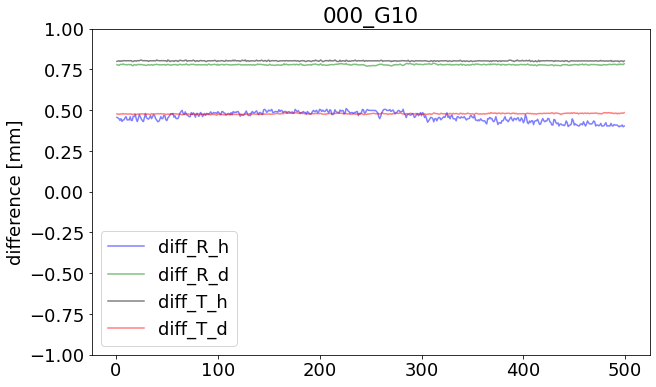

In [325]:
df3["diff_R_h"].plot(style="b-", label = 'diff_R_h', alpha=0.5, figsize=(10,6))
df3["diff_R_d"].plot(style="g-", label = 'diff_R_d', alpha=0.5)
df3["diff_T_h"].plot(style="k-", label = 'diff_T_h', alpha=0.5)
df3["diff_T_d"].plot(style="r-", label = 'diff_T_d', alpha=0.5)

ylim = 1
plt.title(file_name)
plt.legend()
plt.ylabel("difference [mm]")
plt.ylim(-ylim, ylim)

In [326]:
df4 = df3[["R_h", "R_d", "T_h", "T_d", "Guide", "RoadL", "RoadR", "theta", 
           "R_h'", "R_d'", "T_h'", "T_d'", "R_h_man", "R_d_man", "T_h_man", "T_d_man", 
           "diff_R_h", "diff_R_d", "diff_T_h", "diff_T_d"]]
df4

,R_h,R_d,T_h,T_d,Guide,RoadL,RoadR,theta,R_h',R_d',T_h',T_d',R_h_man,R_d_man,T_h_man,T_d_man,diff_R_h,diff_R_d,diff_T_h,diff_T_d
1,-0.741,-9.140,-0.398,-9.123,-9.426,-0.684,1.062,-0.001,0.456,0.779,0.799,0.478,0,0,0,0,0.456,0.779,0.799,0.478
3,-0.754,-9.143,-0.399,-9.124,-9.423,-0.687,1.065,-0.001,0.448,0.775,0.803,0.474,0,0,0,0,0.448,0.775,0.803,0.474
4,-0.761,-9.140,-0.399,-9.124,-9.426,-0.684,1.065,-0.001,0.437,0.780,0.799,0.477,0,0,0,0,0.437,0.780,0.799,0.477
5,-0.754,-9.140,-0.399,-9.124,-9.426,-0.687,1.065,-0.001,0.448,0.781,0.803,0.477,0,0,0,0,0.448,0.781,0.803,0.477
6,-0.767,-9.140,-0.398,-9.125,-9.426,-0.684,1.065,-0.001,0.431,0.780,0.800,0.476,0,0,0,0,0.431,0.780,0.800,0.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.797,-9.136,-0.399,-9.120,-9.426,-0.687,1.059,-0.001,0.403,0.783,0.801,0.481,0,0,0,0,0.403,0.783,0.801,0.481
496,-0.798,-9.139,-0.399,-9.118,-9.426,-0.687,1.059,-0.001,0.402,0.780,0.801,0.483,0,0,0,0,0.402,0.780,0.801,0.483
497,-0.792,-9.138,-0.399,-9.119,-9.426,-0.687,1.062,-0.001,0.409,0.782,0.802,0.482,0,0,0,0,0.409,0.782,0.802,0.482
498,-0.798,-9.139,-0.399,-9.119,-9.426,-0.684,1.059,-0.001,0.398,0.779,0.797,0.481,0,0,0,0,0.398,0.779,0.797,0.481


In [327]:
df4.describe()

,R_h,R_d,T_h,T_d,Guide,RoadL,RoadR,theta,R_h',R_d',T_h',T_d',R_h_man,R_d_man,T_h_man,T_d_man,diff_R_h,diff_R_d,diff_T_h,diff_T_d
count,490.000,490.000,4.900e+02,490.000,490.000,490.000,490.000,4.900e+02,490.000,490.000,490.000,490.000,490.0,490.0,490.0,490.0,490.000,490.000,490.000,490.000
mean,-0.741,-9.141,-3.989e-01,-9.122,-9.425,-0.687,1.063,-1.029e-03,0.460,0.779,0.802,0.478,0.0,0.0,0.0,0.0,0.460,0.779,0.802,0.478
std,0.029,0.003,4.665e-04,0.003,0.002,0.001,0.002,1.460e-06,0.029,0.003,0.002,0.003,0.0,0.0,0.0,0.0,0.029,0.003,0.002,0.003
min,-0.798,-9.149,-4.000e-01,-9.129,-9.429,-0.690,1.059,-1.032e-03,0.398,0.770,0.796,0.469,0.0,0.0,0.0,0.0,0.398,0.770,0.796,0.469
25%,-0.765,-9.142,-3.990e-01,-9.125,-9.426,-0.687,1.062,-1.031e-03,0.437,0.778,0.802,0.476,0.0,0.0,0.0,0.0,0.437,0.778,0.802,0.476
50%,-0.736,-9.141,-3.990e-01,-9.122,-9.426,-0.687,1.062,-1.029e-03,0.465,0.779,0.802,0.478,0.0,0.0,0.0,0.0,0.465,0.779,0.802,0.478
75%,-0.716,-9.139,-3.990e-01,-9.120,-9.423,-0.687,1.065,-1.029e-03,0.485,0.780,0.803,0.481,0.0,0.0,0.0,0.0,0.485,0.780,0.803,0.481
max,-0.696,-9.133,-3.980e-01,-9.116,-9.423,-0.684,1.068,-1.025e-03,0.510,0.788,0.808,0.485,0.0,0.0,0.0,0.0,0.510,0.788,0.808,0.485


結果のCSV出力

In [328]:
# No.2 cell で　save_csv のフラグを設定
if save_csv:
    df3.to_csv(csv_path + "_result.csv", index=False)

<AxesSubplot:>

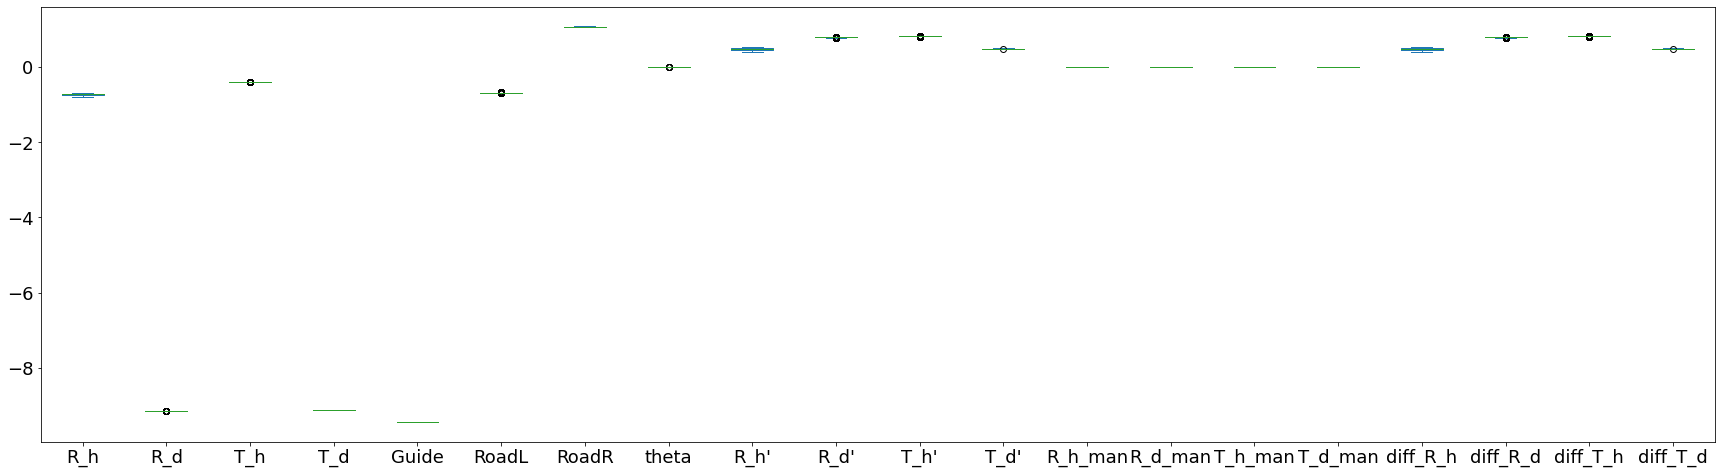

In [329]:
ylim = 1
df4.plot.box(figsize=(30,8))
# plt.ylim(-ylim, ylim)